<a href="https://colab.research.google.com/github/madilima/keras-tensorflow/blob/main/Aula6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


4422102/4422102 [==============================] - 0s 0us/step


Exploração dos dados

In [3]:

len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)

identificacoes_treino.min()
identificacoes_treino.max()

9

Exibir os dados

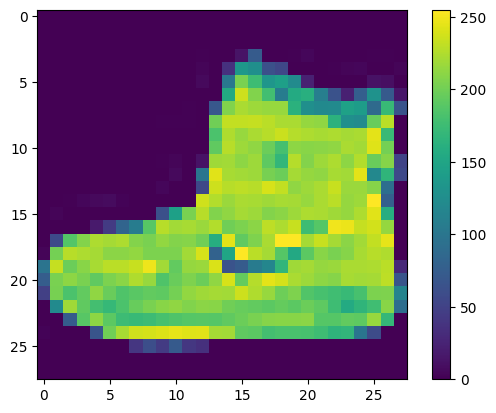

In [4]:

total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']
'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()


In [19]:
imagens_treino = imagens_treino/float(255)

In [5]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 5ms/step - loss: 1.7010 - accuracy: 0.7605 - val_loss: 0.6585 - val_accuracy: 0.7766
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5066 - accuracy: 0.8255 - val_loss: 0.4845 - val_accuracy: 0.8361
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4546 - accuracy: 0.8383 - val_loss: 0.5133 - val_accuracy: 0.8288
Epoch 4/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4273 - accuracy: 0.8478 - val_loss: 0.4392 - val_accuracy: 0.8462
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3972 - accuracy: 0.8581 - val_loss: 0.4219 - val_accuracy: 0.8530


In [6]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

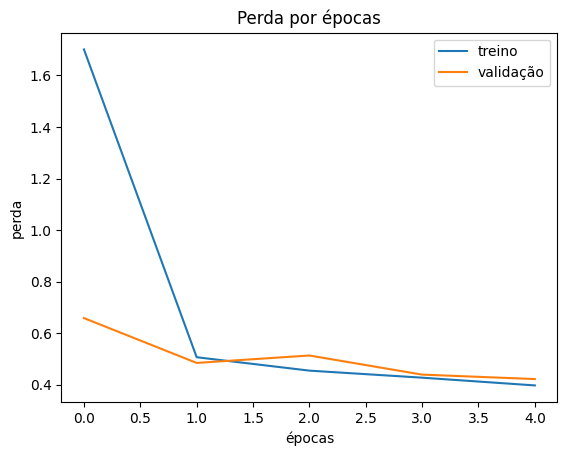

In [8]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [9]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 1s 2ms/step
resultado teste: 2
número da imagem de teste: 2
313/313 [==============================] - 1s 2ms/step
resultado teste modelo salvo: 2
número da imagem de teste: 2


In [10]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 0.4464 - accuracy: 0.8454
Perda do teste: 0.44635137915611267
Acurácia do teste: 0.8453999757766724
